In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Datasets

## India 2014

### Agriculture

In [56]:
inAgri = pd.read_excel('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/Agriculture/india_agriculture_2014.xls')

In [57]:
inAgri.head(1)

,id,country,submission_id,form_created,form_submitted,lat,lng,address,type,land_use,...,branded,infrastructure_type,infrastructure_specific,state,district,category,geom,gaul_2014_adm0,gaul_2014_adm1,gaul_2014_adm2
0,1539,India,1392014034076_Sunny,2/10/2014 11:58,2/10/2014 12:03,25.56872,84.67436,"Gola Road, ARA",Agro-dealers,Rural,...,Yes,Permanent shop,NaN,Bihar,Bhojpur,Arrah,0101000020E6100000C16ED8B6282B5540C49448A29791...,118.0,2434.0,33127.0


In [58]:
inAgri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 22 columns):
id                         65535 non-null int64
country                    65535 non-null object
submission_id              65535 non-null object
form_created               65535 non-null object
form_submitted             65535 non-null object
lat                        65535 non-null float64
lng                        65535 non-null float64
address                    65534 non-null object
type                       65535 non-null object
land_use                   65535 non-null object
name                       65528 non-null object
number_employees           54884 non-null float64
branded                    30469 non-null object
infrastructure_type        33097 non-null object
infrastructure_specific    210 non-null object
state                      65535 non-null object
district                   65535 non-null object
category                   65535 non-null object
geom     

In [59]:
columns_of_interest = ['country','lat','lng','type','land_use','state','category']
inAgri_new = inAgri[columns_of_interest]
inAgri_new.head()

,country,lat,lng,type,land_use,state,category
0,India,25.56872,84.67436,Agro-dealers,Rural,Bihar,Arrah
1,India,26.22088,81.23368,Agro-dealers,Urban,Uttar Pradesh,Raebareli
2,India,26.12233,81.17151,Agro-dealers,Rural,Uttar Pradesh,Raebareli
3,India,29.69170,77.67775,Market Locations,Urban,Uttar Pradesh,Deoband
4,India,26.99658,77.95907,Market Locations,Rural,Uttar Pradesh,Saiyan


** Agriculture types: **

In [60]:
inAgri['type'].value_counts()

Agro-dealers                                     30469
Processors/value addition points                 18801
Market Locations                                  5487
Government Vets                                   2891
Private sector Agricultural service providers     2628
Artificial Insemination Centres                   1947
Dairy Processors                                  1599
Day old chick hatcheries                           900
Farmer Organisations and Cooperatives              404
Dairy chilling plants                              314
National/Regional/State Research Stations           61
Warehouse/Storage/Aggregation Centres               34
Name: type, dtype: int64

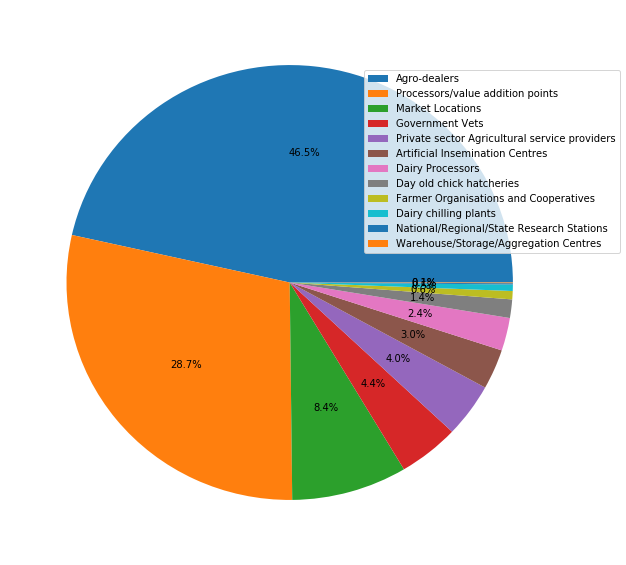

In [61]:
counts = inAgri['type'].value_counts()
labels = counts.index.tolist()
plt.figure(figsize=(10,10))
plt.pie(counts, autopct='%1.1f%%')
plt.legend(labels, loc='upper right',bbox_to_anchor=(1.1, 0.9));

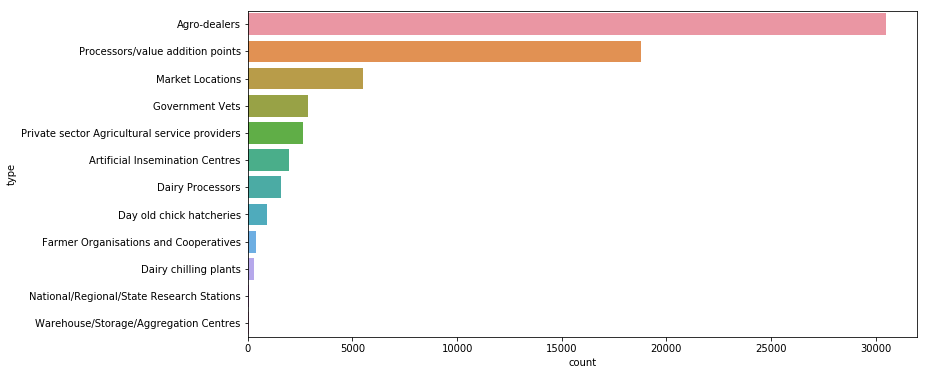

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(y='type',data=inAgri, order=labels);

** Land type: **

In [63]:
inAgri_new['land_use'].value_counts()

Rural    59608
Urban     5927
Name: land_use, dtype: int64

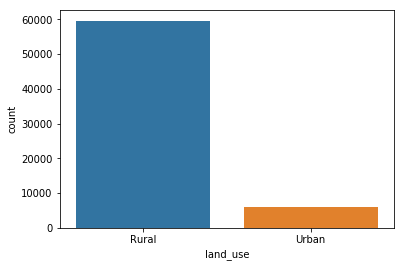

In [64]:
sns.countplot(x='land_use',data=inAgri_new);

** States: **

In [65]:
inAgri['state'].value_counts()

Uttar Pradesh    54907
Bihar            10628
Name: state, dtype: int64

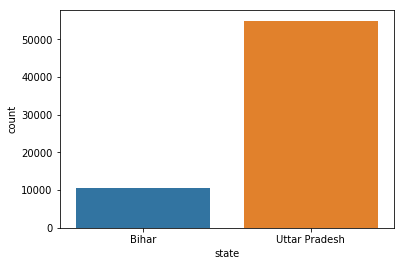

In [66]:
sns.countplot(x='state',data=inAgri);

In [67]:
inAgr_Bihar = inAgri_new[inAgri_new['state'] == 'Bihar']
inAgr_Uttar = inAgri_new[inAgri_new['state'] == 'Uttar Pradesh']

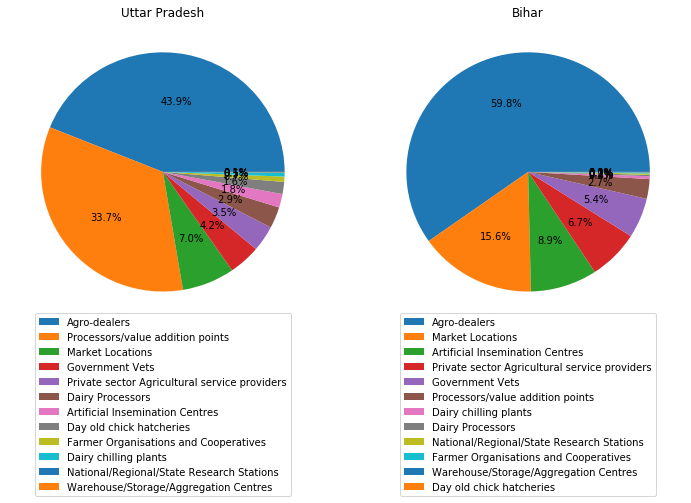

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(12,5.5))

counts = inAgr_Uttar['type'].value_counts()
labels = counts.index.tolist()
axes[0].pie(counts, autopct='%1.1f%%')
axes[0].set_title("Uttar Pradesh")
axes[0].legend(labels, loc='lower center', bbox_to_anchor=(0.5, -0.6))

counts = inAgr_Bihar['type'].value_counts()
labels = counts.index.tolist()
axes[1].pie(counts, autopct='%1.1f%%')
axes[1].set_title("Bihar")
axes[1].legend(labels, loc='lower center', bbox_to_anchor=(0.5, -0.6));

### Read and deal with maps

In [69]:
#Import libs
import geopandas as gpd
from iso3166 import countries

** Download India gadm36 shapefiles from [http://www.gadm.org/download](http://www.gadm.org/download) **

In [70]:
#After unzipping map for India, read in file
inmap = gpd.read_file('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/gadm36_IND_shp/gadm36_IND_1.shp')

In [71]:
inmap.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IND,India,IND.1_1,Andaman and Nicobar,Andaman & Nicobar Islands|Andaman et Nicobar|I...,,Union Territor,Union Territory,,IN.AN,"(POLYGON ((93.78772736000001 6.85264015, 93.78..."
1,IND,India,IND.2_1,Andhra Pradesh,,,State,State,,IN.AP,"(POLYGON ((80.19264221 13.52069569, 80.1926422..."
2,IND,India,IND.3_1,Arunachal Pradesh,Agence de la Frontière du Nord-Est(French-obso...,,State,State,,IN.AR,"POLYGON ((94.21111298 27.61084175, 94.21350861..."
3,IND,India,IND.4_1,Assam,,,State,State,,IN.AS,"POLYGON ((89.83874512 25.96647453, 89.8381424 ..."
4,IND,India,IND.5_1,Bihar,,,State,State,,IN.BR,"(POLYGON ((87.26291655999999 27.85071564, 87.2..."


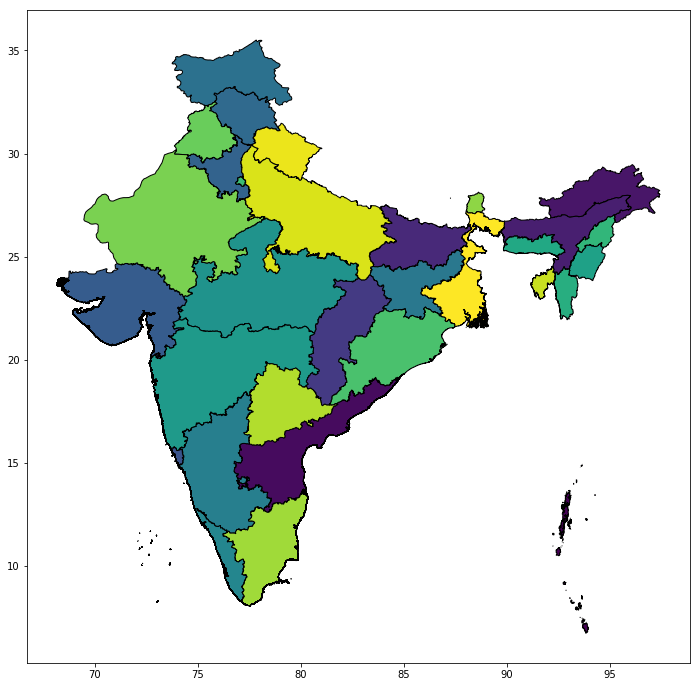

In [72]:
inmap.plot(figsize=(12,12), edgecolor='black', cmap='viridis')

In [417]:
# Get Uttar Pradesh and Bihar states
inmap_state = inmap[(inmap['NAME_1'] == 'Uttar Pradesh') | (inmap['NAME_1'] == 'Bihar')]

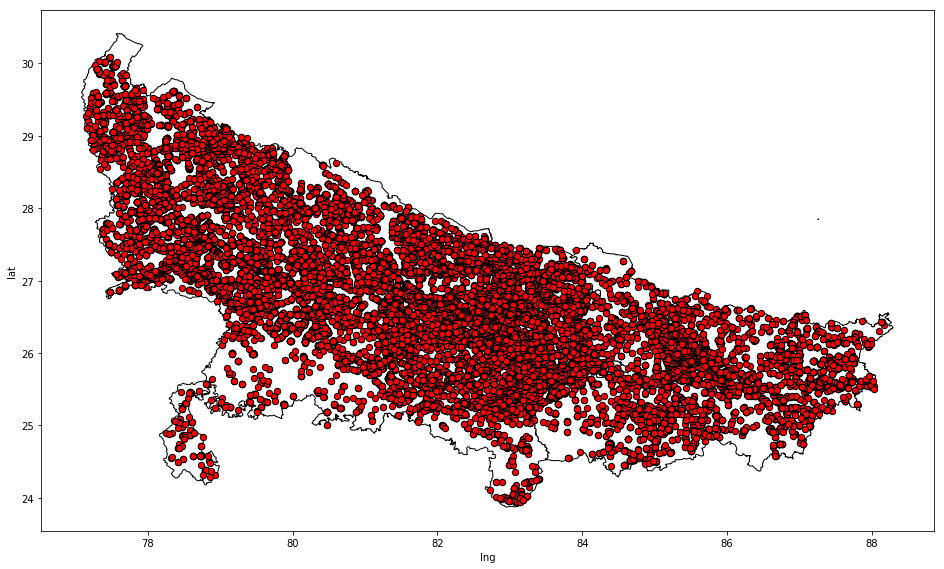

In [420]:
fig, ax = plt.subplots(figsize=[16,16])
ax.set_aspect('equal')

inmap_state.plot(ax=ax, color='white', edgecolor='black')
inAgri[inAgri['type'] == 'Agro-dealers'].plot(ax=ax, x='lng', y='lat', kind='scatter', color='r', edgecolor='k', s=40)

### Rectangular grid
Create a polygon grid using Geopandas

In [396]:
# Shapely for creating polygons
from shapely.geometry import Polygon 

In [397]:
def rectangular_grid(x, y, width, height):

    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()

    rows = int(np.ceil((ymax-ymin) /  height))
    cols = int(np.ceil((xmax-xmin) / width))

    XleftOrigin = xmin
    XrightOrigin = xmin + width
    YtopOrigin = ymax
    YbottomOrigin = ymax - height
    polygons = []

    for i in range(cols):
        Ytop = YtopOrigin
        Ybottom =YbottomOrigin
        for j in range(rows):
            polygons.append(Polygon([(XleftOrigin, Ytop), (XrightOrigin, Ytop), (XrightOrigin, Ybottom), (XleftOrigin, Ybottom)])) 
            Ytop = Ytop - height
            Ybottom = Ybottom - height
        XleftOrigin = XleftOrigin + width
        XrightOrigin = XrightOrigin + width
    
    return gpd.GeoDataFrame({'geometry':polygons})

In [431]:
lng = inAgri[inAgri['type'] == 'Agro-dealers']['lng']
lat = inAgri[inAgri['type'] == 'Agro-dealers']['lat']

grid = rectangular_grid(lng, lat, 0.1, 0.1)

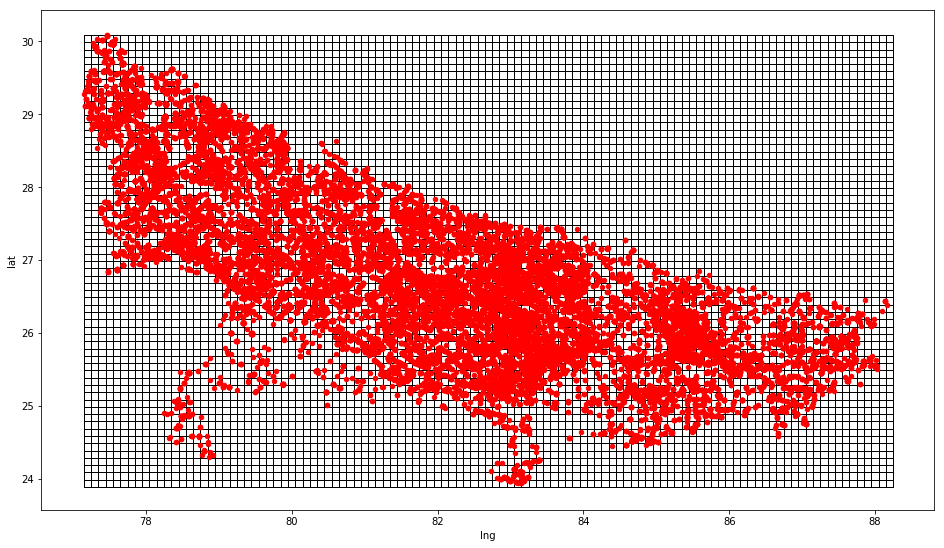

In [432]:
fig, ax = plt.subplots(figsize=(16,16))
ax.set_aspect('equal')

grid.plot(ax=ax, color='white', edgecolor='black')
inAgri[inAgri['type'] == 'Agro-dealers'].plot(ax=ax, x='lng', y='lat', kind='scatter', color='r')

### Heat map
Convert latitude/longtitude columns to geometry column 

In [433]:
# Shapely for converting latitude/longtitude to geometry
from shapely.geometry import Point

In [434]:
def lng_lat_to_geo(lng, lat):
    # creating a geometry column 
    geometry = [Point(xy) for xy in zip(lng, lat)]

    # Coordinate reference system : WGS84
    crs = {'init': 'epsg:4326'}

    # Creating a Geographic data frame 
    return gpd.GeoDataFrame(crs=crs, geometry=geometry)

In [435]:
lng = inAgri[inAgri['type'] == 'Agro-dealers']['lng']
lat = inAgri[inAgri['type'] == 'Agro-dealers']['lat']
points = lng_lat_to_geo(lng,lat)
points.head()

,geometry
0,POINT (84.67435999999999 25.56872)
1,POINT (81.23368000000001 26.22088)
2,POINT (81.17151 26.12233)
3,POINT (80.06865999999999 27.41452)
4,POINT (79.99354 27.40183)


In [436]:
grid.head()

,geometry
0,"POLYGON ((77.14754000000001 30.08266, 77.24754..."
1,"POLYGON ((77.14754000000001 29.98266, 77.24754..."
2,"POLYGON ((77.14754000000001 29.88266, 77.24754..."
3,"POLYGON ((77.14754000000001 29.78266, 77.24754..."
4,"POLYGON ((77.14754000000001 29.68265999999999,..."


In [437]:
def count_the_points(grid, points):
    g = grid.copy()
    p = points.copy()
    
    joined = gpd.tools.sjoin(g, p)
    joined.drop('index_right',axis=1,inplace=True)
    point_counts = joined.groupby(joined.index).agg('count')
    point_counts.rename(columns={"geometry": "count"}, inplace=True)
    
    grid = g.merge(point_counts, how='left', left_index=True, right_index=True)
    
    return grid

In [438]:
density = count_the_points(grid, points)
density.head()

,geometry,count
index_left,,
0,"POLYGON ((77.14754000000001 30.08266, 77.24754...",NaN
1,"POLYGON ((77.14754000000001 29.98266, 77.24754...",NaN
2,"POLYGON ((77.14754000000001 29.88266, 77.24754...",NaN
3,"POLYGON ((77.14754000000001 29.78266, 77.24754...",NaN
4,"POLYGON ((77.14754000000001 29.68265999999999,...",NaN


/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


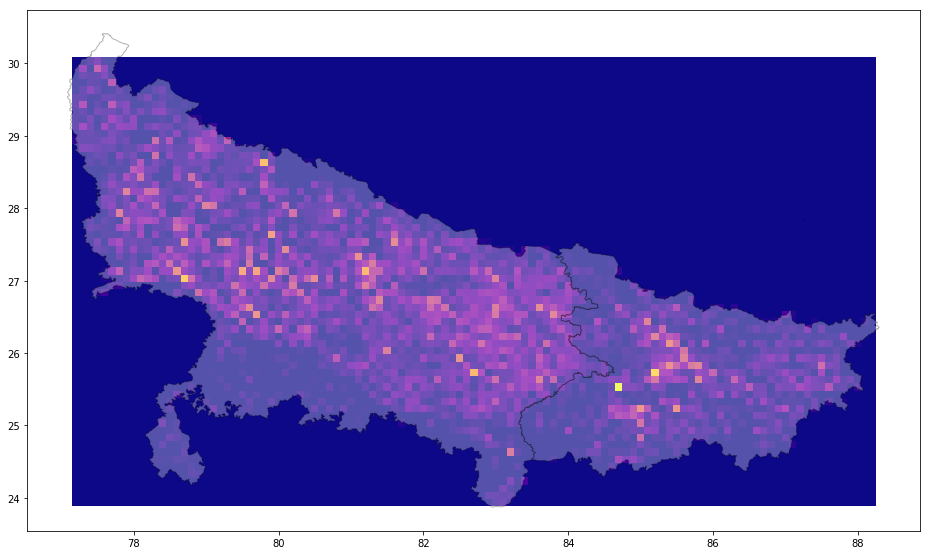

In [450]:
fig, ax = plt.subplots(figsize=[16,16])
ax.set_aspect('equal')

density.plot(ax=ax, column="count", cmap='plasma')
inmap_state.plot(ax=ax, color='white', edgecolor='black', alpha=0.3)

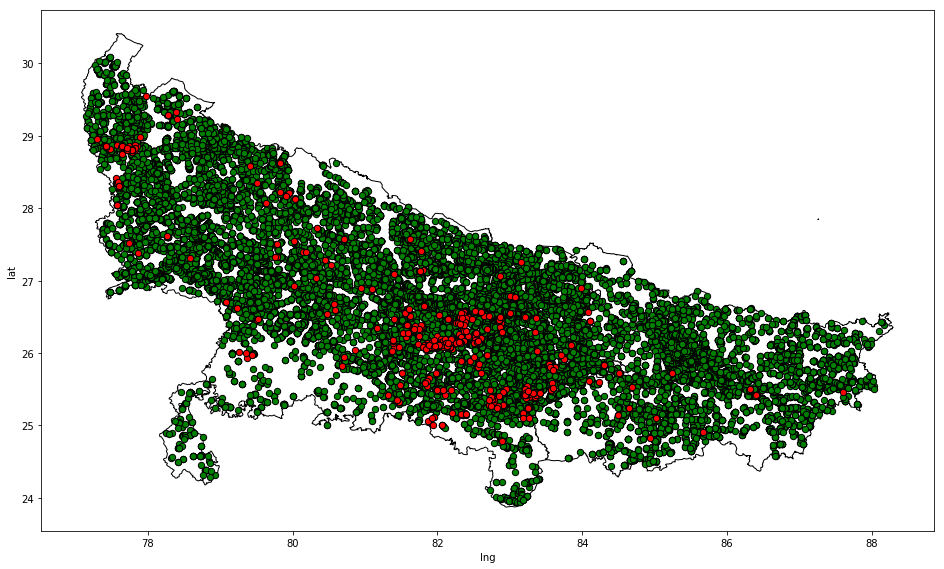

In [454]:
fig, ax = plt.subplots(figsize=[16,16])
ax.set_aspect('equal')

inmap_state.plot(ax=ax, color='white', edgecolor='black')
inAgri[inAgri['type'] == 'Agro-dealers'].plot(ax=ax, x='lng', y='lat', kind='scatter', color='g', edgecolor='k', s=40)
inAgri[inAgri['type'] == 'Farmer Organisations and Cooperatives'].plot(ax=ax, x='lng', y='lat', kind='scatter', color='r', edgecolor='k', s=40)

/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


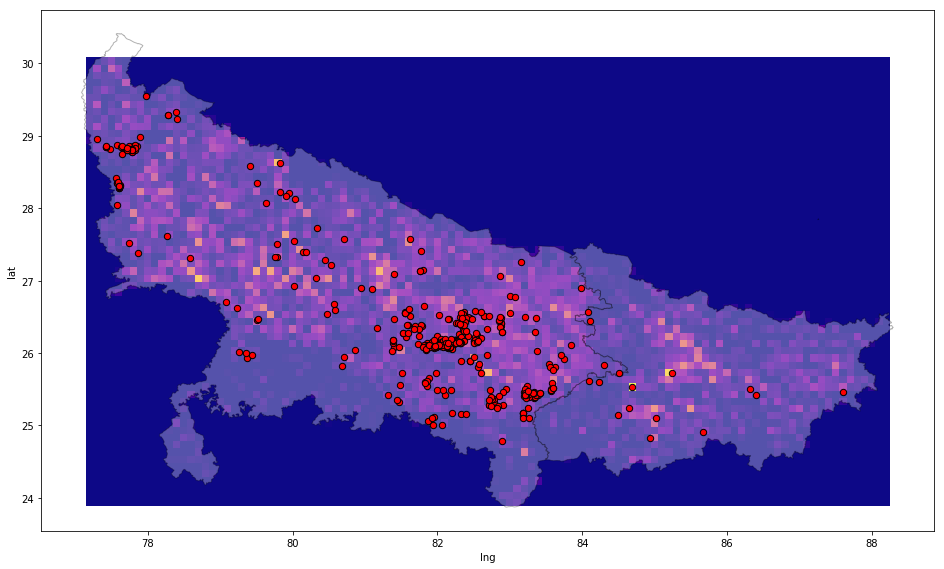

In [452]:
fig, ax = plt.subplots(figsize=[16,16])
ax.set_aspect('equal')

density.plot(ax=ax, column="count", cmap='plasma')
inmap_state.plot(ax=ax, color='white', edgecolor='black', alpha=0.3)
inAgri[inAgri['type'] == 'Farmer Organisations and Cooperatives'].plot(ax=ax, x='lng', y='lat', kind='scatter', color='r', edgecolor='k', s=40)

### Voronoi tessellation
Built a Voronoi tessellation from poits

In [288]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import LineString
# The shapely.ops module has a polygonize that returns a generator for Shapely Polygon objects.
from shapely.ops import polygonize

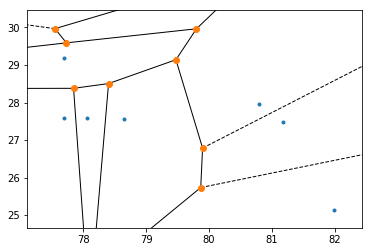

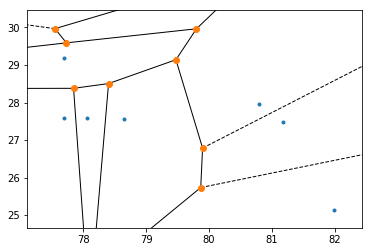

In [312]:
#points = np.random.random((10, 2))
lng = inAgri[inAgri['type'] == 'Dairy Processors']['lng']
lat = inAgri[inAgri['type'] == 'Dairy Processors']['lat']

points = np.zeros((10,2))
points[:,0] = lng[:10]
points[:,1] = lat[:10]

vor = Voronoi(points)
voronoi_plot_2d(vor)

build a collection of Shapely LineString objects

In [313]:
lines = [
    LineString(vor.vertices[line])
    for line in vor.ridge_vertices
    if -1 not in line
]

In [314]:
voronoid = []
for poly in polygonize(lines):
    voronoid.append(poly)

In [315]:
voronoid = gpd.GeoDataFrame(voronoid)
voronoid.rename(columns={0: "geometry"}, inplace=True)
voronoid.head()

,geometry
0,"POLYGON ((78.06348512071538 23.2336666617845, ..."
1,"POLYGON ((78.13920351912994 23.35499643996831,..."
2,"POLYGON ((78.40023507615292 28.50477492344056,..."
3,"POLYGON ((79.79916385230308 29.96532928283286,..."


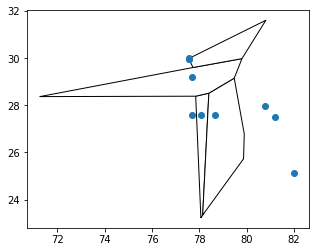

In [316]:
voronoid.plot(color='white', edgecolor='black')
plt.scatter(x=points[:,0], y=points[:,1])

## Kenya 2015
### Agriculture

In [338]:
kenAgri = pd.read_excel('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/Agriculture/kenya_agriculture_2015.xls')

In [340]:
kenAgri.head(1)

,submission_id,form_name,form_created,form_submitted,province,county,constituency,ward,lat,long,gps_accuracy,type,ag_dealer_name,ag_dealer_operational,ag_dealer_num_employees,ex_post_operational,ex_post_contact_num,ex_post_num_employees
0,1433841551991_Stellan,Agriculture,2015-06-09,2015-06-09,NYANZA,HOMA BAY,SUBA SOUTH,GWASSI SOUTH,-0.76614,34.07594,9,Farmer Organisations And Cooperatives,NaN,NaN,NaN,NaN,NaN,NaN


In [345]:
kenAgri['type'].unique()

array(['Farmer Organisations And Cooperatives', 'Agro-Dealers',
       'Extension Posts/Offices', 'Government And Private Vets',
       'Artificial Insemination Centres',
       'Seed Multipliers/Seed Companies',
       'Private Sector Agricultural Service Providers',
       'Warehouse/Storage/Aggregation Centres/Collection Centres',
       'Market Locations', 'Abattoirs/ Slaughter Houses', 'Cattle Dips',
       'Processors/Value Addition Points', 'Day Old Chick Hatcheries',
       'Dairy Chilling Plants', 'Fish Landing Sites', 'Dairy Processors',
       'Fish Hatcheries', 'National/Regional/State Research Stations',
       'Ranches'], dtype=object)

Download Kenia gadm36 shapefiles from http://www.gadm.org/download

In [347]:
#After unzipping map for Kenya, read in file
kenmap = gpd.read_file('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/gadm36_KEN_shp/gadm36_KEN_1.shp')

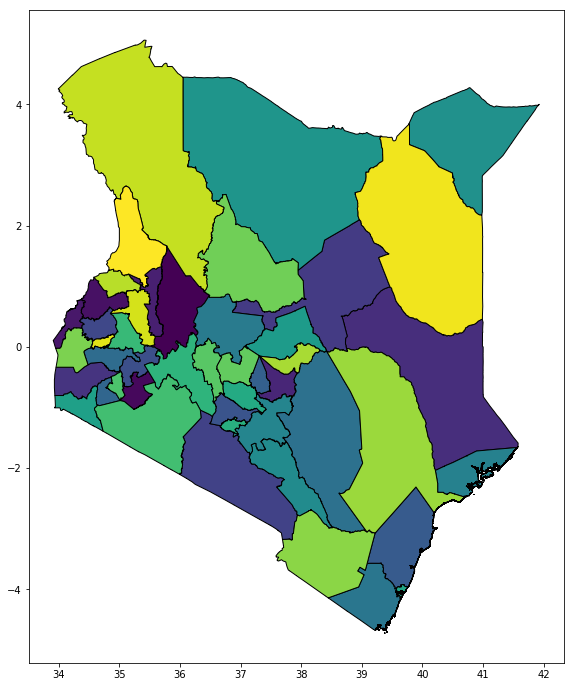

In [348]:
kenmap.plot(figsize=(12,12), edgecolor='black', cmap='viridis')

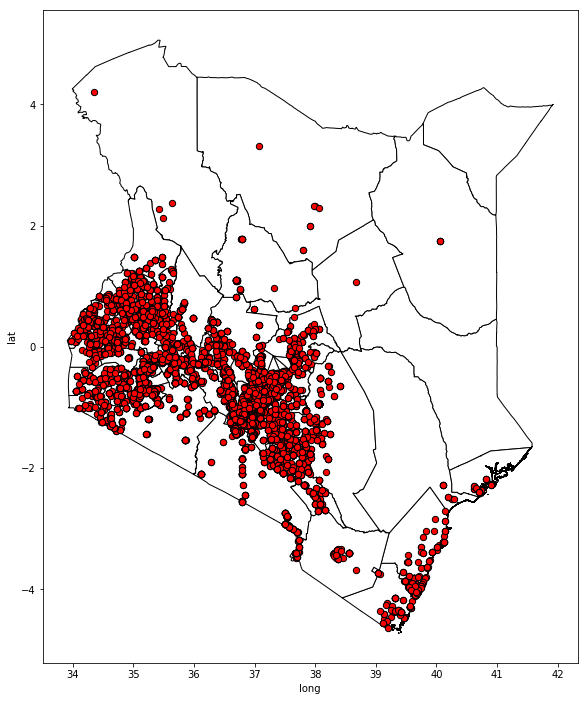

In [380]:
fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

kenmap.plot(ax=ax, color='white', edgecolor='black')
kenAgri[kenAgri['type'] == 'Agro-Dealers'].plot(ax=ax, x='long', y='lat', kind='scatter', color='r', edgecolor='k', s=40)

In [391]:
long = kenAgri[kenAgri['type'] == 'Agro-Dealers']['long']
lat = kenAgri[kenAgri['type'] == 'Agro-Dealers']['lat']

grid = rectangular_grid(long, lat, 0.2, 0.2)

In [392]:
long = kenAgri[kenAgri['type'] == 'Agro-Dealers']['long']
lat = kenAgri[kenAgri['type'] == 'Agro-Dealers']['lat']
points = lng_lat_to_geo(long,lat)

In [393]:
density = count_the_points(grid, points)

/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


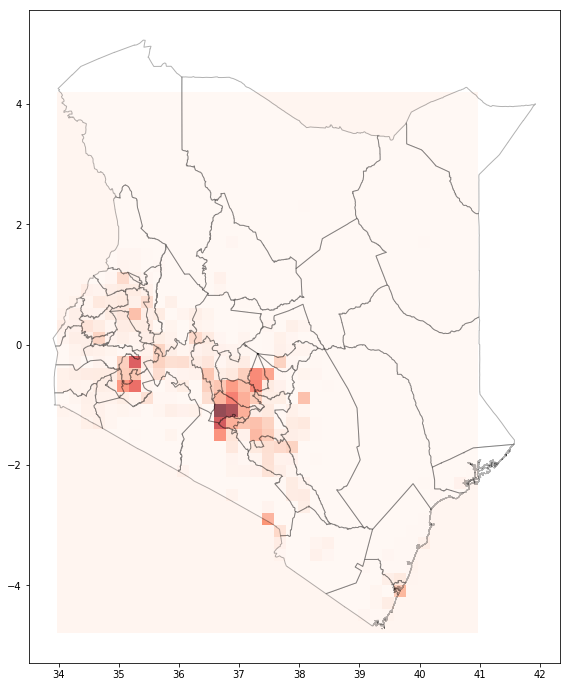

In [394]:
fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

density.plot(ax=ax, column="count", cmap='Reds')
kenmap.plot(ax=ax, color='white', edgecolor='black', alpha=0.3)

In [465]:
long = kenAgri[kenAgri['type'] == 'Agro-Dealers']['long']
lat = kenAgri[kenAgri['type'] == 'Agro-Dealers']['lat']

points = np.zeros((long.shape[0],2))
points[:,0] = long
points[:,1] = lat

vor = Voronoi(points)

In [468]:
lines = [
    LineString(vor.vertices[line])
    for line in vor.ridge_vertices
    if -1 not in line
]

voronoid = []
for poly in polygonize(lines):
    voronoid.append(poly)
    
voronoid = gpd.GeoDataFrame(voronoid)
voronoid.rename(columns={0: "geometry"}, inplace=True)

(-5.5, 5.5)

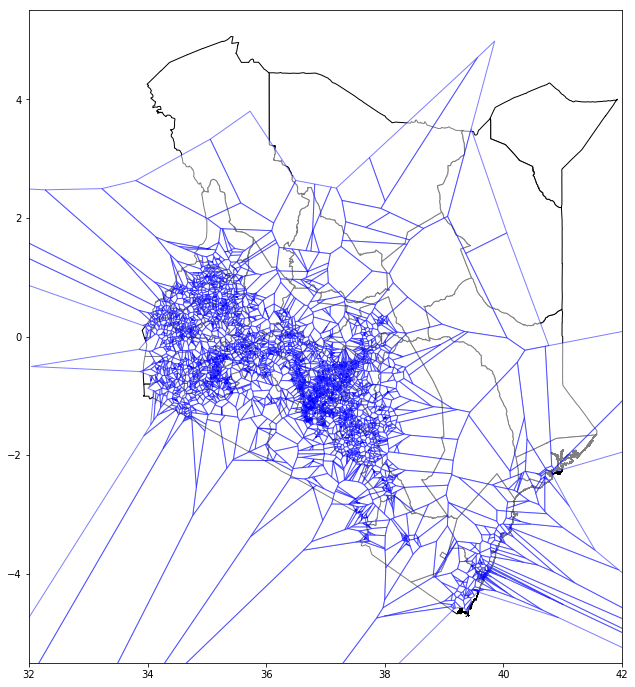

In [481]:
fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

kenmap.plot(ax=ax, color='white', edgecolor='black')
voronoid.plot(ax=ax, color='white', edgecolor='blue', alpha=0.5)

ax.set_xlim(32,42)
ax.set_ylim(-5.5,5.5)